In [2]:
from _imports import *
from utils import Euler2fixedpt
from ssn_2dtopoV1 import SSN2DTopoV1, _SSN_Base
from params import GridParameters

In [43]:
grid_pars = GridParameters(
    gridsize_Nx=10,  # Number of grid points in one dimension
    gridsize_deg=90,  # Size of the grid in degrees of visual angle
    magnif_factor=1,  # Magnification factor to convert degrees to mm
    hyper_col=1,  # Hypercolumn
)

# Define connection parameters
conn_pars = {
    'J_2x2': torch.tensor([[1.82650658, 0.68194475], [2.06815311, 0.5106321]]), 
    's_2x2': torch.tensor([[0.2, 0.4], [0.09, 0.09]]),  
    'p_local': [0.14,0.7],  
    'sigma_oris': 1000,  
}

# Define other parameters
n = 2  
k = 0.04
tauE = 20 # Time constant for excitatory neurons
tauI = 10  # Time constant for inhibitory neurons

In [44]:
ssn_2d_topo = SSN2DTopoV1(n=n, k=k, tauE=tauE, tauI=tauI, grid_pars=grid_pars, conn_pars=conn_pars)

PyTorch: drdt(test_r) = torch.Size([200])
      converged to fixed point at iter=201,      as max(abs(dx./max(xvec,1.0))) < 1e-06 


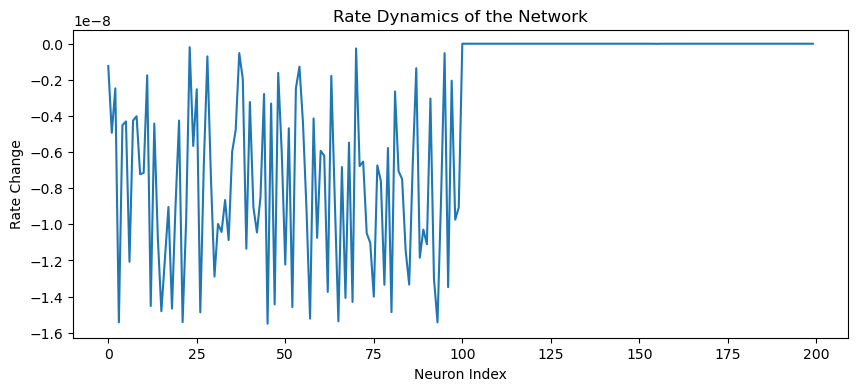

In [45]:
torch.set_default_dtype(torch.float32)

# Creating a simple stimulus for the simulation
radius_s = 0.5
sigma_RF = 0.4
ori_s = 45
sig_ori_EF = 32

gE, gI = 0.37328625, 0.26144141
contrast = 0.6

# Grating stimulus
inp_vec_grating = ssn_2d_topo.make_grating_input(radius_s, sigma_RF, ori_s=ori_s, sig_ori_EF=sig_ori_EF, gE=gE, gI=gI, contrast=contrast)

# Find the network's fixed point response to the grating stimulus
r_init = torch.rand(ssn_2d_topo.N, device=ssn_2d_topo.device,dtype=torch.float32) * 0.01
Tmax = 500
dt = 1
xtol = 1e-6
r_fp_grating, CONVG_grating = ssn_2d_topo.fixed_point_r(inp_vec_grating, r_init, Tmax, dt, xtol)

# Rate dynamics
r_dyn = ssn_2d_topo.drdt(r_fp_grating, inp_vec_grating)

# Plotting 
plt.figure(figsize=(10, 4))
plt.plot(r_dyn.cpu().detach().numpy(), label="Rate Dynamics")
plt.xlabel("Neuron Index")
plt.ylabel("Rate Change")
plt.title("Rate Dynamics of the Network")
plt.show()

In [46]:
W = ssn_2d_topo.make_W(**conn_pars)
W_np = W.detach().cpu().numpy()  # Convert PyTorch tensor to NumPy array

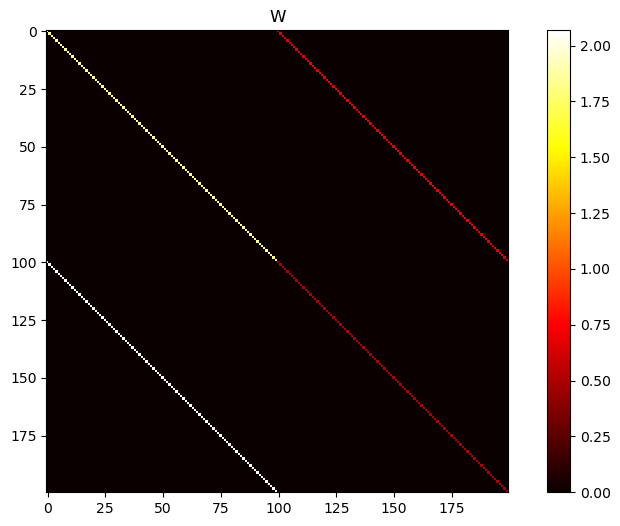

In [47]:
plt.imshow(W_np, cmap='hot', interpolation='nearest')
plt.title('W')
plt.colorbar()

plt.show()

tensor(55)
PyTorch: drdt(test_r) = torch.Size([200])
      converged to fixed point at iter=201,      as max(abs(dx./max(xvec,1.0))) < 1e-06 
PyTorch: drdt(test_r) = torch.Size([200])
      converged to fixed point at iter=201,      as max(abs(dx./max(xvec,1.0))) < 1e-06 
PyTorch: drdt(test_r) = torch.Size([200])
      converged to fixed point at iter=201,      as max(abs(dx./max(xvec,1.0))) < 1e-06 
PyTorch: drdt(test_r) = torch.Size([200])
      converged to fixed point at iter=201,      as max(abs(dx./max(xvec,1.0))) < 1e-06 
PyTorch: drdt(test_r) = torch.Size([200])
      converged to fixed point at iter=201,      as max(abs(dx./max(xvec,1.0))) < 1e-06 
PyTorch: drdt(test_r) = torch.Size([200])
      converged to fixed point at iter=201,      as max(abs(dx./max(xvec,1.0))) < 1e-06 
PyTorch: drdt(test_r) = torch.Size([200])
      converged to fixed point at iter=201,      as max(abs(dx./max(xvec,1.0))) < 1e-06 
PyTorch: drdt(test_r) = torch.Size([200])
      converged to fixed point

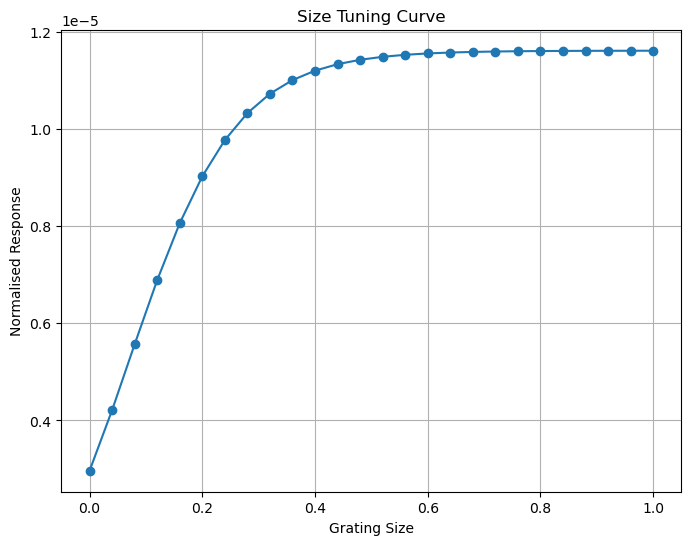

In [65]:
sigma_RF = 0.1
ori_s = 45
sig_ori_EF = 32
gE = 1
gI = 1
contrast = 0.5

# Define the grid size and identify the central neuron
grid_size = 100
central_neuron_idx = ssn_2d_topo.center_inds[0]
print(central_neuron_idx)

# Define different sizes for the grating stimuli
sizes = torch.arange(0, 1.01, 0.04) 
responses = []

for size in sizes:
    # Generate grating stimulus for each size
    inp_vec_grating = ssn_2d_topo.make_grating_input(size.item(), sigma_RF, ori_s=ori_s, sig_ori_EF=sig_ori_EF, gE=gE, gI=gI, contrast=contrast)

    # Compute the fixed point response
    r_fp_grating, _ = ssn_2d_topo.fixed_point_r(inp_vec_grating, r_init, Tmax, dt, xtol)

    # Extract the response of the central neuron
    central_neuron_response = r_fp_grating[central_neuron_idx]
    responses.append(central_neuron_response)

responses = torch.tensor(responses)  # Convert list to tensor
#responses /= torch.mean(responses)

# Plot the size tuning curve
plt.figure(figsize=(8, 6))
plt.plot(sizes.numpy(), responses.numpy(), marker='o')  # Convert tensors to NumPy arrays for plotting
plt.xlabel('Grating Size')
plt.ylabel('Normalised Response')
plt.title('Size Tuning Curve')
plt.grid(True)
plt.show()